# Revisions PAA
## Goal: 
To review to Reviewer's 4 request to demonstrate that the tools, established with data from the Bhatia lab, provide similar results for a given protease when populated with data from the literature.

To this end, we will apply our kinetic package to reanalyze data from Holt et al. 2022. In this paper, the authors provide raw data from a fluorogenis screen of 11 proteases against 11 substrates and subsequently present the results in the form of a heatmap of product formation rates (RFU/min). 

We will use our "kinetic" package to automatically analyze these raw kinetic inputs and our "vis" package to produce visualizations of te aggregated results, including a heatmap, that should match that previously published and included in Figure 4A. 

In [1]:
pwd

'/Users/mariaalonso/Work/protease_activity_analysis/notebooks'

In [2]:
cd ..

/Users/mariaalonso/Work/protease_activity_analysis


In [3]:
import protease_activity_analysis as paa
from utils import get_output_dir
import pandas as pd
import os
import numpy as np

We will first create a directory to store our results for the data from Holt et al.

In [4]:
in_path = 'data/alternative data sources/Heatmap Raw Data_Holt_2022.xlsx'
out_dir = os.path.join(get_output_dir(), 'Holt2022')
in_dir = os.path.join('data', 'Holt2022')

#Create a new directory if it does not exist 
if not os.path.exists(out_dir):
    # Create a new directory because it does not exist 
    os.makedirs(out_dir)

    #Create a new directory if it does not exist 
if not os.path.exists(in_dir):
    # Create a new directory because it does not exist 
    os.makedirs(in_dir)

We will next create a dictionary to map tab names to protease names

In [5]:
prot_map = {'KLK2': 'KLK2', 'CTSS': 'CTSS', 'ADAM': 'ADAMTS1', 
            'PLAS': 'PLASMIN', 'THROMB':'THROMBIN', 'FACXIA': 'Factor XIa',
            'MP7': 'MMP7', 'M11': 'MMP11', 'M8': 'MMP8', 'M1': 'MMP1', 
            'M13': 'MMP13'}
sheet_name= 'THROMB'
prot_name = prot_map[sheet_name]
print(prot_name)

THROMBIN


We will next have to do a bit of reformatting, namely tansposing the data, resetting the index, dropping NaNs and renaming the first column to get raw data in the correct format for input into the kinetic dataset class. We can iterate across all protease tabs to reformat the data

In [12]:
prot=sheet_name
sheet_data = pd.read_excel(in_path,
                sheet_name=prot, header=3, index_col=0, engine='openpyxl')
sheet_data_t=sheet_data.T #transpose
sheet_data_t_i=sheet_data_t.reset_index() #reset index
in_data = sheet_data_t_i.iloc[0:11,0:13] #delete nan
in_data

Time,index,0.0,6.0,12.0,18.0,24.0,30.0,36.0,42.0,48.0,54.0,60.0,66.0
0,sub1,6411.0,6983.0,7412.0,7784.0,8327.0,8778.0,9045.0,9337.0,9768.0,10044.0,10295.0,10439.0
1,sub2,294781.0,326528.0,340358.0,343953.0,355319.0,365882.0,373930.0,384165.0,396559.0,403664.0,415625.0,419486.0
2,sub3,5997.0,5199.0,5220.0,5202.0,5228.0,5225.0,5202.0,5244.0,5230.0,5186.0,5315.0,5264.0
3,sub4,227298.0,2610970.0,2946571.0,3047559.0,3144791.0,3208156.0,3242936.0,3250337.0,3250635.0,3256028.0,3259243.0,3279218.0
4,sub5,5929.0,7926.0,10556.0,12386.0,13831.0,14896.0,15652.0,16231.0,16952.0,17246.0,17294.0,17747.0
5,sub6,186662.0,452175.0,1015883.0,1523520.0,1997387.0,2358781.0,2722903.0,3020136.0,3315506.0,3544653.0,3746469.0,3960948.0
6,sub7,5974.0,4499.0,4505.0,4502.0,4428.0,4418.0,4441.0,4453.0,4331.0,4354.0,4432.0,4388.0
7,sub8,215180.0,340117.0,614158.0,885977.0,1138342.0,1376276.0,1586363.0,1786522.0,1958723.0,2117158.0,2300125.0,2500491.0
8,sub9,5247.0,4741.0,4780.0,4810.0,4751.0,4824.0,4752.0,4794.0,4824.0,4837.0,4812.0,4753.0
9,sub10,191537.0,828749.0,1640317.0,2132337.0,2433389.0,2595247.0,2693468.0,2754896.0,2788545.0,2818456.0,2824605.0,2834459.0


In [13]:
for prot in prot_map.keys():
    prot_name = prot_map[prot] # fetch true protease name
    print(prot_name)
    sheet_data = pd.read_excel(in_path,
                sheet_name=prot, header=3, index_col=0, engine='openpyxl') #import
    sheet_data_t=sheet_data.T #transpose
    sheet_data_t_i=sheet_data_t.reset_index() #reset index
    in_data = sheet_data_t_i.iloc[0:11,0:13] #delete nan
    in_data = in_data.rename(columns={'index': prot_name+'-Substrate'}) #rename first col
    in_data.to_excel(os.path.join(in_dir, prot_name+'.xlsx'), index=False) #save excel


KLK2
CTSS
ADAMTS1
PLASMIN
THROMBIN
Factor XIa
MMP7
MMP11
MMP8
MMP1
MMP13


Lets try loading 1 file, e.g. THROMBIN

In [14]:
in_path = os.path.join(in_dir, 'THROMBIN.xlsx')
fc_time = 6.0
linear_time = 6.0
data = paa.kinetic.KineticDataset(in_path, fc_time, linear_time, out_dir)

If we rank order substrates based on the initial rates returned by Kinetic dataset, we appreciate that substrates 4,10,6 and 8 are best cleaved by thrombin (from best to worst). This is in agreement with the heatmap of Fig 4A. 

In [15]:
data.get_initial_rate()

,Initial rate at t=6.0
THROMBIN-Substrate,
sub1,95.333333
sub10,106202.000000
sub11,-56.166667
sub2,5291.166667
sub3,-133.000000
sub4,397278.666667
sub5,332.833333
sub6,44252.166667
sub7,-245.833333


We can also use the plotting functionality of KineticDataset to plot the raw and fold change data for each substarte and thrombin. These plots are also in agreement with the plots provided in S3.

<AxesSubplot:title={'center':'THROMBIN'}, xlabel='Time (min)', ylabel='Raw Intensity'>

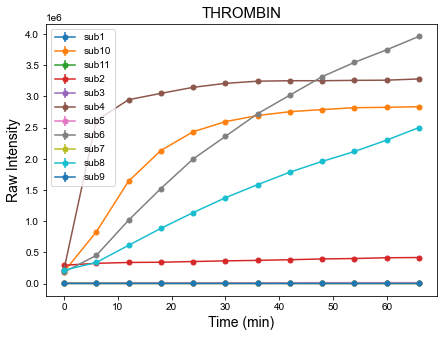

In [16]:
# Plot raw kinetic data - also saves 'ADAMTS1_Raw Intensity_kinetic.pdf' in output folder
data.plot_kinetic(data.get_raw(), title = data.sample_name, ylabel = 'Raw Intensity', close_plot=False)

<AxesSubplot:title={'center':'THROMBIN'}, xlabel='Time (min)', ylabel='Fold Change'>

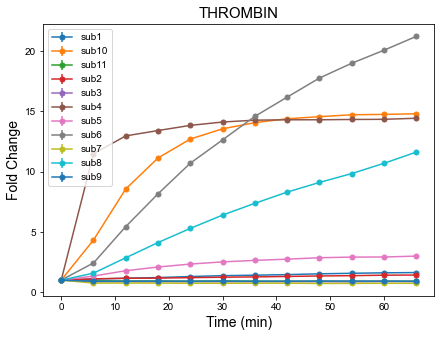

In [17]:
# Plot kinetic data as a function of fold change over time -  saves 'ADAMTS1_Fold Change_kinetic.pdf' in output folder
data.plot_kinetic(data.get_fc(), title = data.sample_name, ylabel = 'Fold Change', close_plot=False)

Having validated that KineticDataset works well for a given protease, we will now apply the KineticDataset class across the list of files we have reformatted to plot a heatmap of PFR across all protease-substrates pairs as shown in Fig 4A. 

In [18]:
# Define path for folder where all raw input files for a screen are saved, load and analyze all relevant data, save fc as csv for subsequent data aggregation and visualization
in_path = in_dir
fc_time = 6.0
linear_time = 6.0
sample_list = []

for filename in os.listdir(in_path):
    if not filename.startswith('.'):
        print('Analyzing ', filename)
        full_file_path = os.path.join(in_path, filename)
        data_temp = paa.kinetic.KineticDataset(full_file_path, fc_time, linear_time, out_dir)
        data_temp.write_csv(data_temp.get_initial_rate(), 'PFR_6')
        data_temp.plot_kinetic(data_temp.get_raw(), title = data_temp.sample_name, ylabel = 'Raw Intensity', close_plot=True)
        sample_list.append(data_temp.get_sample_name())
    
print(sample_list) 

Analyzing  ADAMTS1.xlsx
Analyzing  MMP1.xlsx
Analyzing  MMP11.xlsx
Analyzing  THROMBIN.xlsx
Analyzing  CTSS.xlsx
Analyzing  MMP7.xlsx
Analyzing  MMP13.xlsx
Analyzing  PLASMIN.xlsx
Analyzing  MMP8.xlsx
Analyzing  Factor XIa.xlsx
Analyzing  KLK2.xlsx
['ADAMTS1', 'MMP1', 'MMP11', 'THROMBIN', 'CTSS', 'MMP7', 'MMP13', 'PLASMIN', 'MMP8', 'Factor XIa', 'KLK2']


We will next aggregate the product formation rates for each substrate across all proteases to make a heatmap of RFUs.

In [19]:
# Get all paths to output files of interest (e.g. PFR at 6 min), for proteases of interest, here all proteases in the recombinant screen
fc_files = []
for prot in sample_list:
    fc_files.append(os.path.join(out_dir, prot, str(prot)+'_PFR_6.csv'))

# Aggregate all PFR values
agg_df = paa.vis.aggregate_data(fc_files, out_dir, 'Holt_agg_PFR')

# Visualize matrix
agg_df.columns = sample_list
agg_df

,ADAMTS1,MMP1,MMP11,THROMBIN,CTSS,MMP7,MMP13,PLASMIN,MMP8,Factor XIa,KLK2
,,,,,,,,,,,
sub1,18.333333333333332,63.5,14.166666666666666,95.33333333333333,444.6666666666667,4.333333333333333,121.16666666666667,1171.3333333333333,148.5,12.666666666666666,-59.333333333333336
sub10,3038.6666666666665,2276.5,3719.6666666666665,106202.0,98.0,3547.8333333333335,3197.5,241630.0,3490.1666666666665,250975.33333333334,41632.5
sub11,-114.16666666666667,-7.166666666666667,-115.66666666666667,-56.166666666666664,-46.5,-88.0,-106.16666666666667,959.0,-76.83333333333333,-54.0,-52.0
sub2,4755.833333333333,-1480.3333333333333,3385.8333333333335,5291.166666666667,5113.5,5468.166666666667,3314.1666666666665,312673.1666666667,4120.166666666667,224061.0,73777.16666666667
sub3,-139.83333333333334,-32.833333333333336,-147.83333333333334,-133.0,-126.66666666666667,265.5,15.166666666666666,-271.6666666666667,150.83333333333334,-117.0,-149.66666666666666
sub4,935.0,41.166666666666664,1446.5,397278.6666666667,829.6666666666666,2007.6666666666667,1823.3333333333333,186347.66666666666,-920.1666666666666,310244.3333333333,2066.6666666666665
sub5,-109.33333333333333,-66.66666666666667,-87.0,332.8333333333333,-50.833333333333336,45.333333333333336,10.5,1748.1666666666667,-2.5,-74.0,925.8333333333334
sub6,-1122.8333333333333,354.1666666666667,-1114.5,44252.166666666664,-6.333333333333333,-197.66666666666666,-882.1666666666666,446943.6666666667,-582.0,2874.3333333333335,-1141.5
sub7,-210.16666666666666,-144.16666666666666,-199.0,-245.83333333333334,-140.0,41.333333333333336,-120.33333333333333,-191.83333333333334,-73.83333333333333,-185.0,-201.33333333333334


,sub1,sub10,sub11,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9
ADAMTS1,18.333333,3038.666667,1.0,4755.833333,1.000000,935.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MMP1,63.500000,2276.500000,1.0,1.000000,1.000000,41.166667,1.000000,354.166667,1.000000,370.833333,1.000000
MMP11,14.166667,3719.666667,1.0,3385.833333,1.000000,1446.500000,1.000000,1.000000,1.000000,1.000000,1.000000
THROMBIN,95.333333,106202.000000,1.0,5291.166667,1.000000,397278.666667,332.833333,44252.166667,1.000000,20822.833333,1.000000
CTSS,444.666667,98.000000,1.0,5113.500000,1.000000,829.666667,1.000000,1.000000,1.000000,1357.333333,1.000000
MMP7,4.333333,3547.833333,1.0,5468.166667,265.500000,2007.666667,45.333333,1.000000,41.333333,1.000000,1.000000
MMP13,121.166667,3197.500000,1.0,3314.166667,15.166667,1823.333333,10.500000,1.000000,1.000000,4.000000,1.000000
PLASMIN,1171.333333,241630.000000,959.0,312673.166667,1.000000,186347.666667,1748.166667,446943.666667,1.000000,973874.166667,2772.166667
MMP8,148.500000,3490.166667,1.0,4120.166667,150.833333,1.000000,1.000000,1.000000,1.000000,360.333333,1.000000
Factor XIa,12.666667,250975.333333,1.0,224061.000000,1.000000,310244.333333,1.000000,2874.333333,1.000000,1.000000,1.000000


,sub1,sub10,sub11,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9
ADAMTS1,2.908721,8.019174,0.000000,8.467127,0.000000,6.840547,0.000000,0.000000,0.000000,0.000000,0.000000
MMP1,4.151040,7.730394,0.000000,0.000000,0.000000,3.717629,0.000000,5.869768,0.000000,5.915753,0.000000
MMP11,2.650892,8.221389,0.000000,8.127355,0.000000,7.276902,0.000000,0.000000,0.000000,0.000000,0.000000
THROMBIN,4.557380,11.573098,0.000000,8.573794,0.000000,12.892393,5.807642,10.697660,0.000000,9.943805,0.000000
CTSS,6.097325,4.584967,0.000000,8.539639,0.000000,6.721024,0.000000,0.000000,0.000000,7.213277,0.000000
MMP7,1.466337,8.174092,0.000000,8.606699,5.581615,7.604728,3.814043,0.000000,3.721669,0.000000,0.000000
MMP13,4.797167,8.070125,0.000000,8.105961,2.719100,7.508422,2.351375,0.000000,0.000000,1.386294,0.000000
PLASMIN,7.065898,12.395163,6.865891,12.652914,0.000000,12.135369,7.466323,13.010188,0.000000,13.789037,7.927384
MMP8,5.000585,8.157705,0.000000,8.323649,5.016175,0.000000,0.000000,0.000000,0.000000,5.887030,0.000000
Factor XIa,2.538974,12.433110,0.000000,12.319674,0.000000,12.645115,0.000000,7.963576,0.000000,0.000000,0.000000


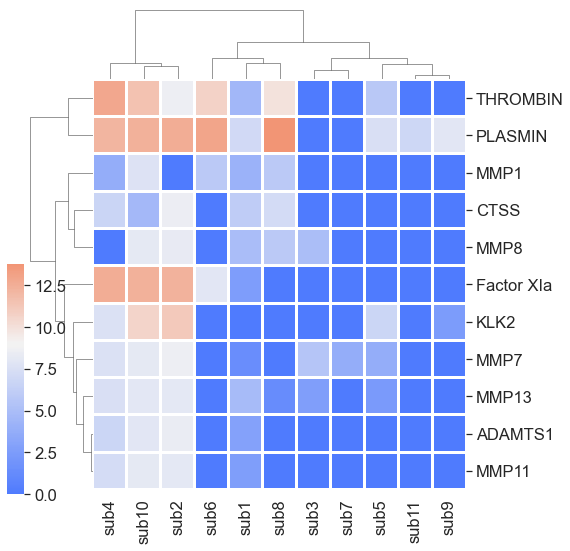

In [20]:
# Transpose matrix, perform hierarchical clustering and plot heatmap, this is not taking the log(x) because of negative numbers
agg_df_t = agg_df.T
agg_df_t = agg_df_t.astype(float)

# Replace all negative numbers with PFR=1 that is defined fro log(x) and repeat
agg_df_t = agg_df_t.clip(lower=1)
display(agg_df_t)

# log transform matrix
agg_df_t_copy = agg_df_t.copy()
agg_df_t_copy = agg_df_t_copy.applymap(lambda x: np.log(x))
agg_df_t_copy

# plot hierarchical map of substrate protease pairs
paa.vis.plot_heatmap(agg_df_t_copy, out_dir, center=9,  metric='euclidean', method='ward', scale=None)

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,sub11
KLK2,0.000000,11.208805,0.000000,7.633692,6.830694,0.000000,0.000000,0.000000,2.498700,10.636636,0.000000
CTSS,6.097325,8.539639,0.000000,6.721024,0.000000,0.000000,0.000000,7.213277,0.000000,4.584967,0.000000
ADAMTS1,2.908721,8.467127,0.000000,6.840547,0.000000,0.000000,0.000000,0.000000,0.000000,8.019174,0.000000
PLASMIN,7.065898,12.652914,0.000000,12.135369,7.466323,13.010188,0.000000,13.789037,7.927384,12.395163,6.865891
THROMBIN,4.557380,8.573794,0.000000,12.892393,5.807642,10.697660,0.000000,9.943805,0.000000,11.573098,0.000000
Factor XIa,2.538974,12.319674,0.000000,12.645115,0.000000,7.963576,0.000000,0.000000,0.000000,12.433110,0.000000
MMP7,1.466337,8.606699,5.581615,7.604728,3.814043,0.000000,3.721669,0.000000,0.000000,8.174092,0.000000
MMP11,2.650892,8.127355,0.000000,7.276902,0.000000,0.000000,0.000000,0.000000,0.000000,8.221389,0.000000
MMP8,5.000585,8.323649,5.016175,0.000000,0.000000,0.000000,0.000000,5.887030,0.000000,8.157705,0.000000
MMP1,4.151040,0.000000,0.000000,3.717629,0.000000,5.869768,0.000000,5.915753,0.000000,7.730394,0.000000


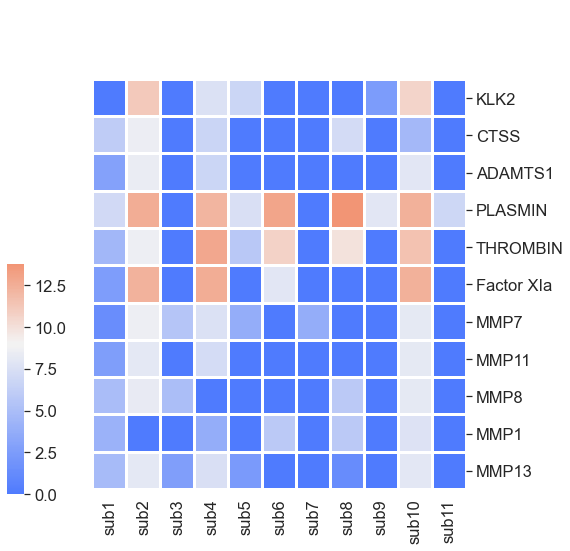

In [23]:
# Now rearrange the rows and columns such that they are the same as in the paper
agg_df_t_copy = agg_df_t_copy[['sub1', 'sub2', 'sub3', 'sub4','sub5', 'sub6','sub7', 'sub8','sub9', 'sub10','sub11']]
agg_df_t_copy = agg_df_t_copy.reindex(['KLK2', 'CTSS', 'ADAMTS1', 'PLASMIN', 'THROMBIN', 'Factor XIa', 'MMP7', 'MMP11', 'MMP8', 'MMP1', 'MMP13'])

# plot reordered hierarchical map of substrate protease pairs
paa.vis.plot_heatmap(agg_df_t_copy, out_dir, center=9,  metric='euclidean', method='ward', scale=None, row_cluster=False, col_cluster=False)